In [1]:
def fn(x, y):
    return x*x + 6.3001*y*y - 3.44*x + 5.6224*y + 2.9584

def fnx(x):
    return 2*x - 3.44

def fny(y):
    return 2*6.3001*y + 5.6224

In [2]:
def model(x, y, num_iterations, learning_rate = 0.001, rate=1e-10):
    fn_value= []
    for i in range(num_iterations):
        x_plus = x - learning_rate * fnx(x)
        y_plus = y - learning_rate * fnx(y)
        fn_plus = fn(x_plus, y_plus)
        fn_rel = fn(x,y)
        if abs(fn_plus - fn_rel) < rate:
            return 'iteration_times = %s , x = %s, y = %s, fn = %s' % (str(i),str(x_plus),str(y_plus),str(fn_plus))
        x = x_plus
        y = y_plus
        print(x,y ,fn_plus, fn_rel)
    print('iterate fails,pls try update your parmeters')

In [8]:
# 在向量分析中, 雅可比矩阵是一阶偏导数以一定方式排列成的矩阵, 其行列式称为雅可比行列式
# 海森矩阵(Hessian matrix或Hessian)是一个自变量为向量的实值函数的二阶偏导数组成的方块矩阵
# 二阶导数就是判断函数局部的凹凸性。
# 此道题目涉及到多元函数求极值的问题
# f(x)=f(x1,x2,⋯,xn)　＝　x*x + 6.3001*y*y - 3.44*x + 5.6224*y + 2.9584

# 雅可比矩阵为分别对自变量求偏导数　2*x - 3.44 , 2*6.3001*y + 5.6224
# 海森矩阵在此继续球偏导数　　　　2,0
#                           0,2*6.3001


初始点为:
[1 1] 

第 1 次迭代结果:
[ 1.72       -0.44621514] 

第 2 次迭代结果:
[ 1.72       -0.44621514] 

-1.2544


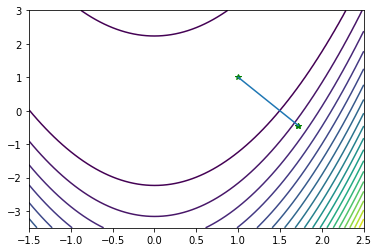

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def fn(x):
    return x[0]*x[0] + 6.3001*x[1]*x[1] - 3.44*x[0] + 5.6224*x[1] + 2.9584

def jacobian(x):
    return np.array([2*x[0] - 3.44,2*6.3001*x[1]+5.6224])

def hessian(x):
    return np.array([[2,0],[0,2*6.3001]])

X1=np.arange(-1.5,1.5+1.05,0.05)
X2=np.arange(-3.5,2+1.05,0.05)
[x1,x2]=np.meshgrid(X1,X2)
f=100*(x2-x1**2)**2+(1-x1)**2; # 给定的函数
plt.contour(x1,x2,f,20) # 画出函数的20条轮廓线


def newton(x0):

    print('初始点为:')
    print(x0,'\n')
    W=np.zeros((2,10**3))
    i = 1
    imax = 1000
    W[:,0] = x0 
    x = x0
    delta = 1
    alpha = 1

    while i<imax and delta>10**(-5):
        p = -np.dot(np.linalg.inv(hessian(x)),jacobian(x))
        x0 = x
        x = x + alpha*p
        W[:,i] = x
        delta = sum((x-x0)**2)
        print('第',i,'次迭代结果:')
        print(x,'\n')
        i=i+1
    W=W[:,0:i]  # 记录迭代点
    return W

x0 = np.array([1,1])
W=newton(x0)

print(fn([W[0,-1],W[1,-1]]))
plt.plot(W[0,:],W[1,:],'g*',W[0,:],W[1,:]) # 画出迭代点收敛的轨迹
plt.show()